In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<h1>Load and Prep dataset</h1>

In [3]:
data = pd.read_csv('data/dataset.csv')
data.head()

,Symbol,Date,Open,High,Low,Close,Volume
0,A,2009-03-02 05:00:00,9.73,9.80,9.02,9.07,5994808
1,A,2009-03-03 05:00:00,9.22,9.34,8.88,9.07,7057671
2,A,2009-03-04 05:00:00,9.24,9.70,9.11,9.52,5427775
3,A,2009-03-05 05:00:00,9.28,9.46,8.95,8.97,9678690
4,A,2009-03-06 05:00:00,8.91,9.36,8.60,9.05,6800559


In [4]:
# Copy the data and sort by symbol and date
df = data.copy().sort_values(by=["Symbol", "Date"])
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", drop=True, inplace=True)
df.head()

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2009-03-02 05:00:00,A,9.73,9.80,9.02,9.07,5994808
2009-03-03 05:00:00,A,9.22,9.34,8.88,9.07,7057671
2009-03-04 05:00:00,A,9.24,9.70,9.11,9.52,5427775
2009-03-05 05:00:00,A,9.28,9.46,8.95,8.97,9678690
2009-03-06 05:00:00,A,8.91,9.36,8.60,9.05,6800559


In [5]:
# Group by symbol and describe the data
stats_by_stock:pd.DataFrame = df.groupby("Symbol").describe()
stats_by_stock.head()
# Uncomment to save the stats to a file
# stats_by_stock.to_excel("./stats_by_stock.xlsx")

Open                                                            \
         count       mean        std    min    25%    50%    75%     max   
Symbol                                                                     
A       2769.0  42.459509  18.626818   8.91  28.41  39.28  59.13   89.97   
AAON    2769.0  22.021531  13.418521   5.03   8.97  20.53  33.50   56.77   
AAPL    2769.0  26.613012  15.857837   3.01  14.28  23.97  36.44   81.18   
AB      2769.0  23.772066   5.019205  10.50  21.37  24.24  27.37   35.63   
ABC     2769.0  65.054861  27.112516  14.10  38.28  74.09  87.27  117.39   

          High                                                            \
         count       mean        std    min    25%    50%    75%     max   
Symbol                                                                     
A       2769.0  42.866324  18.735752   9.28  28.81  39.66  59.57   90.64   
AAON    2769.0  22.336649  13.594149   5.12   9.08  20.87  33.90   58.85   
AAPL    2769.0  26.854706  16.008117   3.13  14.40  24.18  36.79   81.96   
AB      2769.0  24.090722   5.028203  10.92  21.65  24.56  27.70   36.06   
ABC     2769.0  65.693980  27.380464  14.78  38.72  75.05  88.06  120.68   

           Low                                                            \
         count       mean        std    min    25%    50%    75%     max   
Symbol                                                                     
A       2769.0  42.047570  18.499743   8.60  28.15  38.89  58.49   89.84   
AAON    2769.0  21.715179  13.256031   4.85   8.82  20.16  33.05   56.31   
AAPL    2769.0  26.370849  15.734694   2.94  14.11  23.72  36.24   80.84   
AB      2769.0  23.459202   4.994666  10.12  21.10  23.95  27.00   35.45   
ABC     2769.0  64.396988  26.827519  13.75  37.90  73.19  86.28  114.75   

         Close                                                            \
         count       mean        std    min    25%    50%    75%     max   
Symbol                                                                     
A       2769.0  42.472033  18.614912   8.90  28.43  39.33  58.99   90.13   
AAON    2769.0  22.041954  13.435865   4.94   8.97  20.50  33.55   57.59   
AAPL    2769.0  26.622297  15.883742   2.97  14.24  23.98  36.57   81.80   
AB      2769.0  23.773221   5.014664  10.27  21.37  24.27  27.39   35.82   
ABC     2769.0  65.064948  27.099850  14.10  38.31  74.03  87.29  115.48   

        Volume                                                       \
         count          mean           std         min          25%   
Symbol                                                                
A       2769.0  3.487931e+06  2.234113e+06    271858.0    1917122.0   
AAON    2769.0  1.705533e+05  1.481593e+05         0.0     104603.0   
AAPL    2769.0  3.146664e+08  2.376126e+08  45448180.0  128960748.0   
AB      2769.0  3.650363e+05  2.365964e+05     46224.0     213487.0   
ABC     2769.0  2.276602e+06  1.448505e+06    283373.0    1379461.0   

                                                
                50%          75%           max  
Symbol                                          
A         2949921.0    4468486.0  2.536965e+07  
AAON       141948.0     197953.0  5.311215e+06  
AAPL    244032876.0  435579844.0  1.880987e+09  
AB         300941.0     443183.0  3.258188e+06  
ABC       1941879.0    2772532.0  1.924127e+07

In [6]:
# Select valid symbols
upper_bound = stats_by_stock["Open"]["max"] < 500
lower_bound = stats_by_stock["Open"]["min"] > 1
outliers_removed = stats_by_stock[upper_bound & lower_bound]
valid_symbols = outliers_removed.index.to_list()

# Remove outliers from the data
mask = df["Symbol"].isin(valid_symbols)
df = df[mask]
print(df.shape)
df.head()

(4784832, 6)


,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2009-03-02 05:00:00,A,9.73,9.80,9.02,9.07,5994808
2009-03-03 05:00:00,A,9.22,9.34,8.88,9.07,7057671
2009-03-04 05:00:00,A,9.24,9.70,9.11,9.52,5427775
2009-03-05 05:00:00,A,9.28,9.46,8.95,8.97,9678690
2009-03-06 05:00:00,A,8.91,9.36,8.60,9.05,6800559


<h1>Feature Engineering</h1>

In [8]:
#Adding Log Volume, as suggested on this site:https://alphascientist.com/feature_engineering.html
from pandas.tseries.frequencies import to_offset

df['log_volume'] = df['Volume'].apply(np.log)

df = df.resample('W').last()

df.tail()

,Symbol,Open,High,Low,Close,Volume,log_volume
Date,,,,,,,
2020-02-02,ZUMZ,32.52,32.52,31.09,31.17,409230,12.922033
2020-02-09,ZUMZ,32.41,32.56,31.36,31.88,162310,11.997263
2020-02-16,ZUMZ,33.87,33.98,32.55,32.61,190770,12.158824
2020-02-23,ZUMZ,32.20,32.20,30.99,31.42,178995,12.095113
2020-03-01,ZUMZ,26.06,27.51,25.96,26.53,325422,12.692878


In [9]:
#Introduce a common financial statistic, 10 or 30 day momentum
#shift pulls the close for a stock 10 days prior
df['Momentum_2Wk'] = df['Close'] - df['Close'].shift(2)
df.tail()

,Symbol,Open,High,Low,Close,Volume,log_volume,Momentum_2Wk
Date,,,,,,,,
2020-02-02,ZUMZ,32.52,32.52,31.09,31.17,409230,12.922033,-3.36
2020-02-09,ZUMZ,32.41,32.56,31.36,31.88,162310,11.997263,-0.22
2020-02-16,ZUMZ,33.87,33.98,32.55,32.61,190770,12.158824,1.44
2020-02-23,ZUMZ,32.20,32.20,30.99,31.42,178995,12.095113,-0.46
2020-03-01,ZUMZ,26.06,27.51,25.96,26.53,325422,12.692878,-6.08


In [10]:
df['Momentum_5Wk'] = df['Close'] - df['Close'].shift(5)
df.tail()

,Symbol,Open,High,Low,Close,Volume,log_volume,Momentum_2Wk,Momentum_5Wk
Date,,,,,,,,,
2020-02-02,ZUMZ,32.52,32.52,31.09,31.17,409230,12.922033,-3.36,-1.50
2020-02-09,ZUMZ,32.41,32.56,31.36,31.88,162310,11.997263,-0.22,-1.95
2020-02-16,ZUMZ,33.87,33.98,32.55,32.61,190770,12.158824,1.44,-1.17
2020-02-23,ZUMZ,32.20,32.20,30.99,31.42,178995,12.095113,-0.46,-3.11
2020-03-01,ZUMZ,26.06,27.51,25.96,26.53,325422,12.692878,-6.08,-5.57


In [11]:
#Removing the first month of data for each symbol that would only have zeroes for 30 day momentum
df_grouped = df.groupby('Symbol')

df = df_grouped.apply(lambda x: x.iloc[30:])

df.reset_index(level=0, drop=True, inplace=True)

df.head()

,Symbol,Open,High,Low,Close,Volume,log_volume,Momentum_2Wk,Momentum_5Wk
Date,,,,,,,,,
2009-10-04,ZUMZ,15.20,15.41,14.87,14.97,365404,12.808759,-2.16,2.06
2009-10-11,ZUMZ,16.41,16.49,15.76,15.99,273629,12.519528,0.34,2.16
2009-10-18,ZUMZ,14.98,15.58,14.83,15.12,555315,13.227291,0.15,1.05
2009-10-25,ZUMZ,14.33,14.58,13.97,14.06,205300,12.232228,-1.93,-3.07
2009-11-01,ZUMZ,14.45,14.80,13.37,13.47,536737,13.193263,-1.65,-2.18


In [12]:
def clean_dataset(df):
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

In [13]:
#Listing the variance in open price explained by each feature we have, using SKLearn
target = df['Open']
features = df.drop(['Symbol', 'High','Low','Open'], axis = 1)
features = clean_dataset(features)
features.tail()

,Close,Volume,log_volume,Momentum_2Wk,Momentum_5Wk
Date,,,,,
2020-02-02,31.17,409230.0,12.922033,-3.36,-1.50
2020-02-09,31.88,162310.0,11.997263,-0.22,-1.95
2020-02-16,32.61,190770.0,12.158824,1.44,-1.17
2020-02-23,31.42,178995.0,12.095113,-0.46,-3.11
2020-03-01,26.53,325422.0,12.692878,-6.08,-5.57


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Suppose 'Open' is what we want to predict
target = df['Open']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(principalComponents, target, test_size=0.2, random_state=42)

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# We could also use mean squared error for loss calculation
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', round(mse, 2))


NameError: name 'principalComponents' is not defined

In [15]:
#sklearn imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [16]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
scaler = StandardScaler()

features_std = scaler.fit_transform(features)

feature_pca = PCA(n_components=4) 
feature_pca.fit(features)

print(feature_pca.explained_variance_ratio_)

[1.00000000e+00 1.09380522e-10 3.18969019e-11 5.82708344e-12]


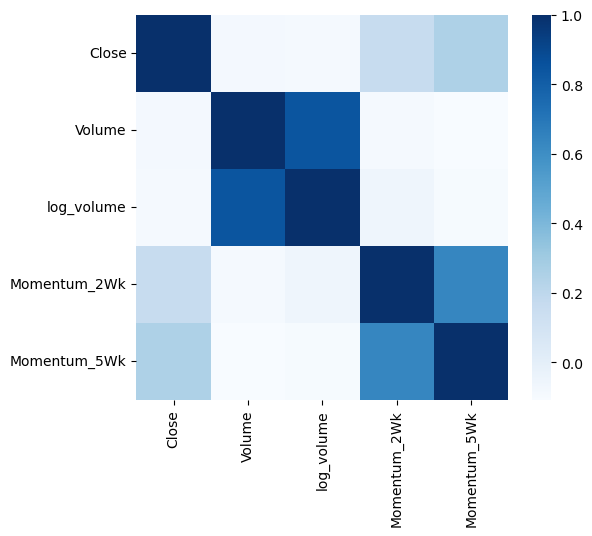

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = features.corr()

#corr matrix with heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=False, cmap=plt.cm.Blues)
# plt.savefig('feature_correlations.png')